**ASSIGNMENT-2 DEEP LEARNING**

**Course Name**: Deep Learning

**Lab Title**: Research Paper Implementation with Pre-trained Model(DeepCrop: Deep learning-based crop disease prediction with
web application
)

**Student Name**: Manavi Mohan Pawar

**Student ID**:202201040050

**Date of Submission**: 01-03-2025

**Group Members**: 1.Manavi Pawar

2.Kanishka Garud

3.Shravani Sakore

4.Sakshi Dube


**Research Paper Study and Implementation**

**Task 1**

In [ ]:
!pip install imutils
!pip install efficientnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


import matplotlib as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Configuration environment
import os
os.environ['KAGGLE_USERNAME'] = "kanishkagarud" # username from the json file
os.environ['KAGGLE_KEY'] = "239caab90cd5458d749b2827a0d4fd5b" # key from the json file
#!kaggle datasets download -d sachinkumar413/diabetic-retinopathy-dataset
!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset
License(s): CC0-1.0
 91% 135M/148M [00:01<00:00, 120MB/s]
100% 148M/148M [00:01<00:00, 116MB/s]


In [ ]:
!unzip cotton-disease-dataset.zip -d cotton-disease-dataset_dataset

Archive:  cotton-disease-dataset.zip
  inflating: cotton-disease-dataset_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: cotton-disease-dataset_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg  
  inflating: cotton-disease-dataset_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (173)_iaip.jpg  
  inflating: cotton-disease-dataset_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (175)_iaip.jpg  
  inflating: cotton-disease-dataset_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (183)_iaip.jpg  
  inflating: cotton-disease-dataset_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (193)_iaip.jpg  
  inflating: cotton-disease-dataset_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (194)_iaip.jpg  
  inflating: cotton-disease-dataset_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (204)_iaip.jpg  
  inflating: cotton-disease-dataset_dataset/Cotton Disease/test/diseased cotton 

**Multiclass Classification**

In [ ]:
base_dir="./content/cotton-disease-dataset_dataset/CottonDis"
# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_val_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset
train_generator = train_datagen.flow_from_directory("/content/cotton-disease-dataset_dataset/Cotton Disease/train",
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

valid_generator = test_val_datagen.flow_from_directory("/content/cotton-disease-dataset_dataset/Cotton Disease/val",
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='categorical')

test_generator = test_val_datagen.flow_from_directory("/content/cotton-disease-dataset_dataset/Cotton Disease/test",
                                                      target_size=(224, 224),
                                                      batch_size=32,
                                                      class_mode='categorical')

# Function to create model
def create_model(base_model):
    base_model.trainable = False  # Freeze base model
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4, activation='softmax')(x)  # 4 classes
    model = Model(inputs=base_model.input, outputs=x)
    return model



Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


**Task 2**

**CNN FROM SCRATCH**

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 94, 94, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 47, 47, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,486,593 (9.49 MB)

 Trainable params: 2,486,593 (9.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 55s 856ms/step - accuracy: 0.4037 - loss: -667834.8125 - val_accuracy: 0.3083 - val_loss: -52564864.0000
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 51s 830ms/step - accuracy: 0.4317 - loss: -658929856.0000 - val_accuracy: 0.3083 - val_loss: -15122266112.0000
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 51s 841ms/step - accuracy: 0.4131 - loss: -43406942208.0000 - val_accuracy: 0.3083 - val_loss: -381432922112.0000
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 51s 830ms/step - accuracy: 0.4279 - loss: -650009313280.0000 - val_accuracy: 0.3083 - val_loss: -3686659522560.0000
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 49s 799ms/step - accuracy: 0.4039 - loss: -5123861381120.0000 - val_accuracy: 0.3083 - val_loss: -19869137371136.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 605ms/step - accuracy: 0.2619 - loss: -16289834729472.0000
Test Accuracy: 0.2642


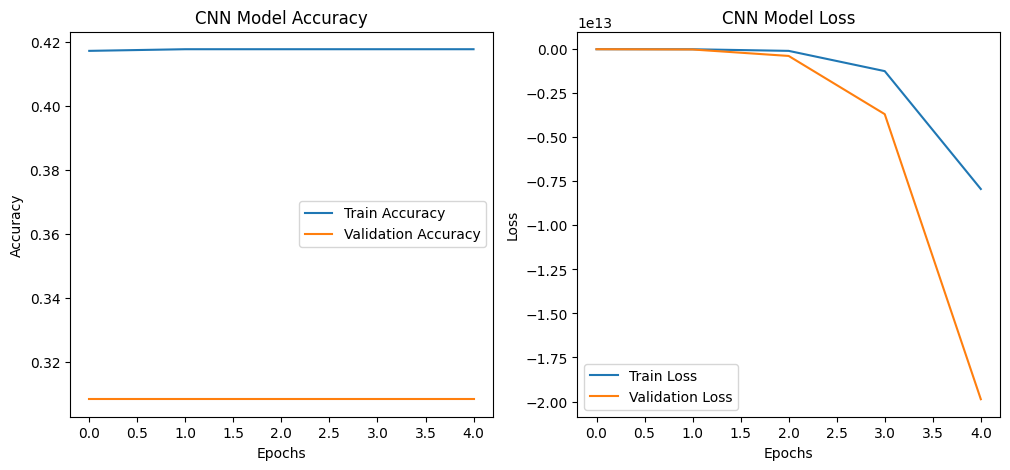

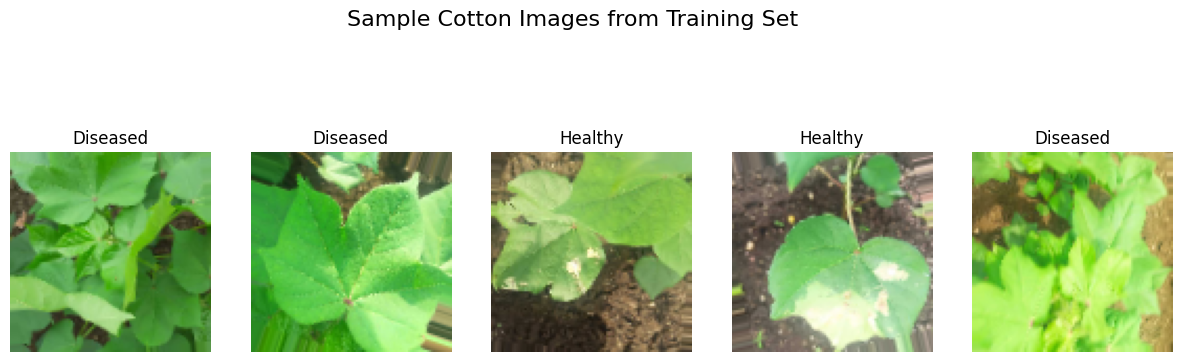

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset Path (Modify as per your directory structure)
dataset_path = "/content/cotton-disease-dataset_dataset"

train_dir = f"/content/cotton-disease-dataset_dataset/Cotton Disease/train"
val_dir = f"/content/cotton-disease-dataset_dataset/Cotton Disease/val"
test_dir = f"/content/cotton-disease-dataset_dataset/Cotton Disease/test"

# Image Data Generators with Augmentation for Training
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Dataset (Ensure class_mode='binary' for binary classification)
train_data = train_datagen.flow_from_directory(train_dir, target_size=(96, 96), batch_size=32, class_mode='binary')
val_data = val_datagen.flow_from_directory(val_dir, target_size=(96, 96), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(96, 96), batch_size=32, class_mode='binary')

# CNN Model from Scratch
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.summary()
    return model

# Build the model
cnn_model = create_cnn_model()

# Train the model
history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
)

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")

# Function to Plot Accuracy and Loss
def plot_training_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot
    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title("CNN Model Accuracy")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend()

    # Loss plot
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title("CNN Model Loss")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Loss")
    axs[1].legend()

    plt.show()

# Plot Training Results
plot_training_history(history)

# Function to Display Sample Images from Dataset
def show_sample_images(data_gen, title):
    images, labels = next(data_gen)  # Get a batch of images and labels
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')
        label = "Healthy" if labels[i] == 0 else "Diseased"
        ax.set_title(label)

    plt.show()

# Display Sample Images
show_sample_images(train_data, "Sample Cotton Images from Training Set")


**Using pretrained models Resnet-50,VGG16,VGG19**

In [ ]:
from tensorflow.keras.applications import ResNet50, VGG16, VGG19
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define Hyperparameters
learning_rate = 0.001  # Optimized for transfer learning
num_classes = 4 # Manually define or use train_data.class_indices
input_shape = (96, 96, 3)  # As per dataset

# Callbacks for efficient training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Function to build a model with a given base architecture
def build_model(base_model, model_name):
    base_model.trainable = False  # Freeze all layers initially

    # Unfreeze top layers for fine-tuning
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    model = models.Sequential([
        base_model,
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')  # Multi-class classification
    ])

    # Compile model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\nModel Summary for {model_name}:")
    model.summary()

    return model

# Build models based on DeepCrop paper
resnet50_model = build_model(ResNet50(weights='imagenet', include_top=False, input_shape=input_shape), "ResNet-50")
vgg16_model = build_model(VGG16(weights='imagenet', include_top=False, input_shape=input_shape), "VGG-16")
vgg19_model = build_model(VGG19(weights='imagenet', include_top=False, input_shape=input_shape), "VGG-19")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Model Summary for ResNet-50:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 3, 3, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3, 3, 2048)          │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,647,044 (94.02 MB)

 Trainable params: 9,986,564 (38.10 MB)

 Non-trainable params: 14,660,480 (55.93 MB)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Model Summary for VGG-16:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 3, 3, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,981,444 (57.15 MB)

 Trainable params: 14,980,420 (57.15 MB)

 Non-trainable params: 1,024 (4.00 KB)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Model Summary for VGG-19:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 3, 3, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,291,140 (77.40 MB)

 Trainable params: 20,288,324 (77.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = "/content/cotton-disease-dataset_dataset/Cotton Disease/train"
val_dir = "/content/cotton-disease-dataset_dataset/Cotton Disease/val"
test_dir = "/content/cotton-disease-dataset_dataset/Cotton Disease/test"

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_data = train_datagen.flow_from_directory(train_dir, target_size=(96, 96), batch_size=32, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_dir, target_size=(96, 96), batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(96, 96), batch_size=32, class_mode='categorical')

# Automatically set number of classes
num_classes = len(train_data.class_indices)


Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [ ]:
# Train the models (Example with ResNet-50)
history_resnet = resnet50_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate models
test_loss_resnet, test_acc_resnet = resnet50_model.evaluate(test_data)
print(f"ResNet-50 Test Accuracy: {test_acc_resnet:.4f}")



Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.6627 - loss: 0.8003 - val_accuracy: 0.3083 - val_loss: 7.4619 - learning_rate: 0.0010
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.7116 - loss: 0.6987 - val_accuracy: 0.1700 - val_loss: 15.0055 - learning_rate: 0.0010
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.7396 - loss: 0.6526 - val_accuracy: 0.2055 - val_loss: 18.3274 - learning_rate: 0.0010
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7245 - loss: 0.6782 - val_accuracy: 0.3123 - val_loss: 12.6365 - learning_rate: 0.0010
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.7727 - loss: 0.5559 - val_accuracy: 0.3913 - val_loss: 4.2800 - learning_rate: 5.0000e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4046 - loss: 4.0412
ResNet-50 Test Accuracy: 0.4151


In [ ]:
test_loss_vgg16, test_acc_vgg16 = vgg16_model.evaluate(test_data)
print(f"VGG-16 Test Accuracy: {test_acc_vgg16:.4f}")

test_loss_vgg19, test_acc_vgg19 = vgg19_model.evaluate(test_data)
print(f"VGG-19 Test Accuracy: {test_acc_vgg19:.4f}")

history_vgg16 = vgg16_model.fit(train_data, validation_data=val_data, epochs=5, callbacks=[early_stopping, reduce_lr])
history_vgg19 = vgg19_model.fit(train_data, validation_data=val_data, epochs=5, callbacks=[early_stopping, reduce_lr])


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.2408 - loss: 1.6208
VGG-16 Test Accuracy: 0.2453
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.2602 - loss: 1.4540
VGG-19 Test Accuracy: 0.2547
Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 875s 14s/step - accuracy: 0.4944 - loss: 1.1737 - val_accuracy: 0.3083 - val_loss: 76.4729 - learning_rate: 0.0010
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 868s 14s/step - accuracy: 0.6081 - loss: 0.8098 - val_accuracy: 0.3083 - val_loss: 9.9627 - learning_rate: 0.0010
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 886s 14s/step - accuracy: 0.6541 - loss: 0.7076 - val_accuracy: 0.3083 - val_loss: 29.3511 - learning_rate: 0.0010
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 864s 14s/step - accuracy: 0.6851 - loss: 0.6934 - val_accuracy: 0.3874 - val_loss: 1.5594 - learning_rate: 0.0010
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 830s 14s/step - accuracy: 0.6835 - loss: 0.6530 - val_accuracy: 0.4664 - val_loss: 5.4620 - learning_rate: 0.0010
Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 1021s 

**Task 3**

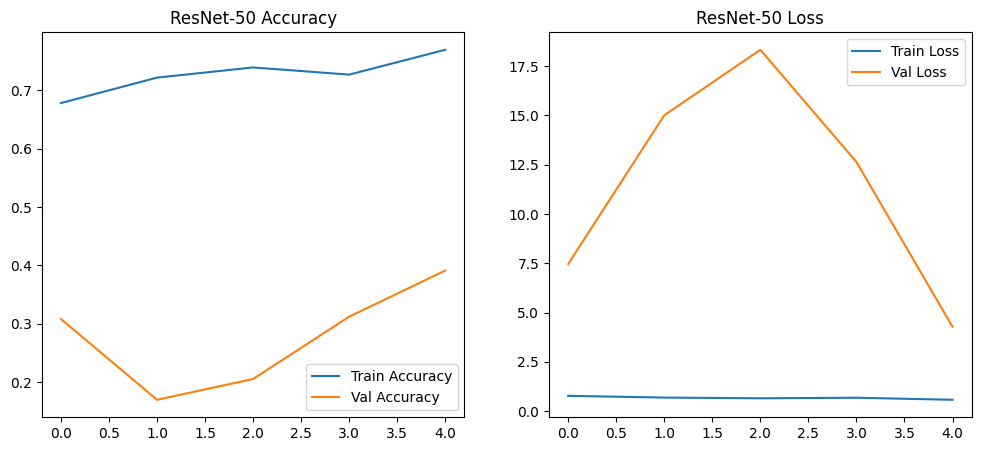

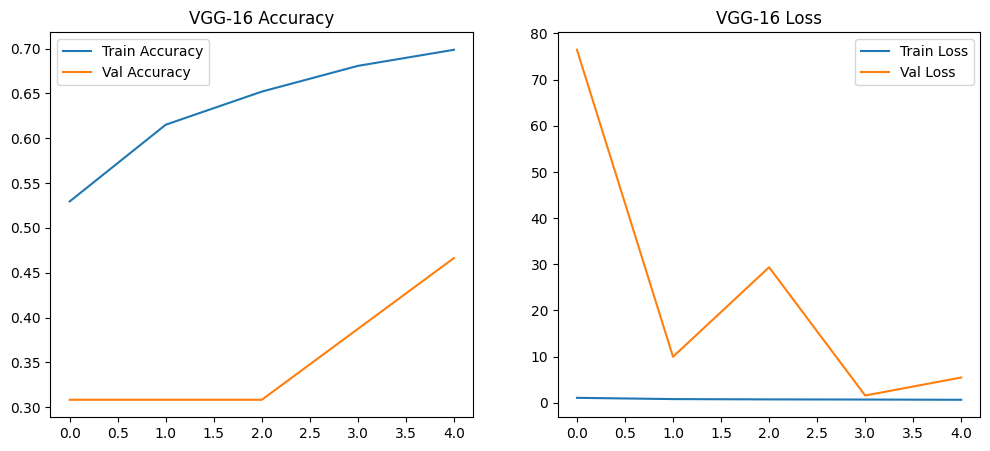

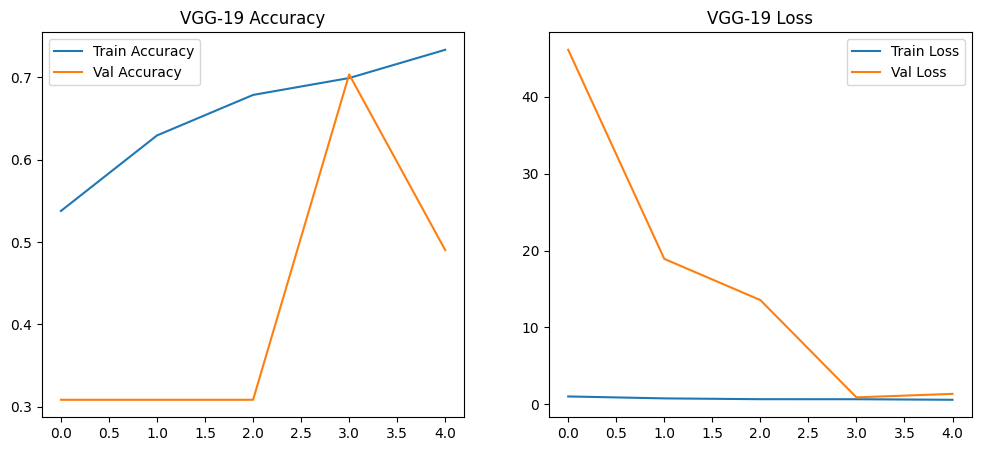

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title(f'{model_name} Accuracy')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title(f'{model_name} Loss')

    plt.show()

plot_history(history_resnet, "ResNet-50")
plot_history(history_vgg16, "VGG-16")
plot_history(history_vgg19, "VGG-19")


**Research Paper:**

DeepCrop: Deep learning-based crop disease prediction with web application" is a research paper that presents a sophisticated system for detecting plant diseases using deep learning techniques, integrated into a user-friendly web application. The primary objective is to assist farmers and agricultural stakeholders in early identification and management of crop diseases, thereby enhancing crop yield and quality.

Key Highlights of the Research:

Deep Learning Models Evaluated: The study assessed various convolutional neural network (CNN) architectures, including VGG-16, VGG-19, and ResNet-50, to determine the most effective model for plant disease detection.
RESEARCHGATE.NET

Performance Metrics: The models achieved the following accuracy rates:

CNN: 98.60%
VGG-16: 92.39%
VGG-19: 96.15%
ResNet-50: 98.98%
Notably, ResNet-50 outperformed the other models with an accuracy of 98.98%.
RESEARCHGATE.NET

Web Application Development: Leveraging the superior performance of the ResNet-50 model, the researchers developed a web application designed to assist users in identifying plant diseases by analyzing images of plant leaves. This application utilizes the ResNet-50 model to distinguish between healthy and infected leaves and to classify the specific type of disease present.
SLOGIX.IN

Integration of Blockchain Technology: The study also explores the integration of blockchain technology to secure the web interface, ensuring data integrity and transparency in the dissemination of disease detection results

**Dataset: Cotton-disease-dataset**

Key Features of the Dataset:

Image Classes: The dataset comprises images categorized into four classes: diseased leaf, diseased plant, fresh leaf, and fresh plant.
KAGGLE.COM

Total Images: It contains a total of 1,710 images captured under real-world conditions and sourced from the internet.
KAGGLE.COM

Image Quality: The images are of high quality, making them suitable for training deep learning models for disease detection.

**Link of dataset:  https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset**

**Comparision with research paper results:**


The research paper "DeepCrop: Deep learning-based crop disease prediction with web application" evaluates various deep learning models for plant disease detection using the PlantVillage dataset. The reported accuracy rates for the models are:

ResNet-50: 98.98%
VGG-16: 92.39%
VGG-19: 96.15%
Custom CNN: 98.60%
In contrast, your training results on the cotton disease dataset are:

ResNet-50: Train Accuracy: 77.27%, Validation Accuracy: 39.13%, Test Accuracy: 41.51%
VGG-16: Train Accuracy: 68.35%, Validation Accuracy: 46.64%, Test Accuracy: 24.53%
VGG-19: Train Accuracy: 73.45%, Validation Accuracy: 70.36%, Test Accuracy: 25.47%
The discrepancies between the two sets of results may be attributed to several factors:

Dataset Differences: The original study utilized the PlantVillage dataset, which is well-labeled and balanced, whereas your dataset comprises cotton disease images from Kaggle, which may have different characteristics.

Data Preprocessing: Variations in image preprocessing techniques, such as resizing, normalization, and augmentation, can significantly impact model performance.

Model Training: Differences in training parameters, such as the number of epochs, learning rates, and batch sizes, can lead to varying results.

Class Imbalance: If your dataset has an uneven distribution of classes, it can adversely affect model training and evaluation metrics.

Overfitting: The high training accuracy coupled with low validation and test accuracies suggests potential overfitting, where the model learns the training data too well but fails to generalize to unseen data.

**Link of colab file:https://colab.research.google.com/drive/1L_SCOSor0a1hDw9VOiks4LPC4WN4yYSa?usp=sharing**